In [345]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import html
from dash import dcc
import dash_bootstrap_components as dbc

In [346]:
df = pd.read_csv('NetflixUserbase.csv')

In [347]:
devices = pd.DataFrame(df['Device'].value_counts()).reset_index()

fig1 = px.pie(devices,
              values='count',
              names='Device',
              color_discrete_sequence=px.colors.sequential.Aggrnyl,
              title='Devices',
              hole=0.2
             )

fig1.update_layout(
    height=200,
    width=300,
    margin=dict(l=10, r=10, t=30, b=10)
)

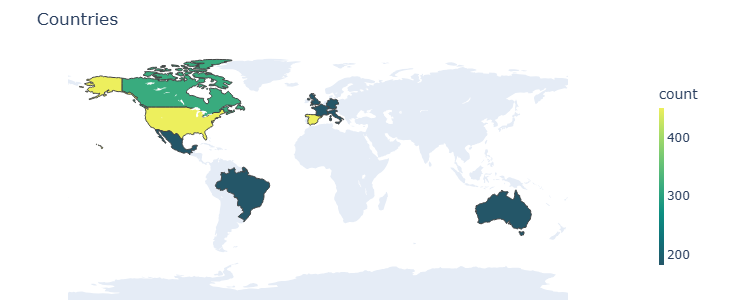

In [348]:
countries = pd.DataFrame(df['Country'].value_counts())

country_to_iso = {
    'United States': 'USA',
    'Spain': 'ESP',
    'Canada': 'CAN',
    'United Kingdom': 'GBR',
    'Australia': 'AUS',
    'Germany': 'DEU',
    'France': 'FRA',
    'Brazil': 'BRA',
    'Mexico': 'MEX',
    'Italy': 'ITA'
}

countries['ISO'] = country_to_iso
countries = countries.reset_index()

fig = px.choropleth(countries, 
                    locations='ISO', 
                    color='count',
                    hover_name='Country',
                    title='Countries',
                    color_continuous_scale=px.colors.sequential.Aggrnyl)

fig.update_geos(
    showframe=False, 
    showcoastlines=False, 
    showland=True
)

fig.update_coloraxes(
    colorbar_len=0.8,
    colorbar_thickness=5
)

fig.update_layout(
    height=300,
    margin=dict(l=0, r=100, t=50, b=0)
)

In [349]:
genders = pd.DataFrame(df['Gender'].value_counts()).reset_index()

fig2 = px.pie(genders,
              values='count',
              names='Gender',
              color_discrete_sequence=px.colors.sequential.Aggrnyl,
              title='Gender',
              hole=0.2
             )

fig2.update_layout(
    height=200,
    width=300,
    margin=dict(l=10, r=10, t=30, b=10)
)

In [350]:
ages = pd.DataFrame(df['Age'].value_counts()).reset_index()

fig3 = px.bar(
    ages,
    x='Age',
    y='count',
    color_continuous_scale=px.colors.sequential.Aggrnyl_r,
    color='count',
    hover_name='Age',
    title='Age',
)

fig3.update_coloraxes(showscale=False)

fig3.update_layout(
    height=300,
    margin=dict(l=0, r=40, t=50, b=0)
)

In [351]:
subs = pd.DataFrame(df['Subscription Type'].value_counts()).reset_index()

fig4 = px.pie(
    subs,
    values='count',
    names='Subscription Type',
    color_discrete_sequence=px.colors.sequential.Aggrnyl,
    title='Subscriptions',
    hole=0.2
)

fig4.update_layout(
    height=200,
    width=300,
    margin=dict(l=10, r=10, t=30, b=10)
)

In [352]:
total_users = df['User ID'].count()

In [353]:
plan = df['Plan Duration'][0]

In [354]:
aggrnyl_colors = px.colors.sequential.Aggrnyl

In [359]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div(
    style={'background-color': '#f3f3f3', 'min-height': '100vh'}, 
    children=dbc.Container([
        html.Br(),
        html.H1(
            'Netflix Userbase Dataset',
            style={'color': 'rgb(6, 56, 74)'}
        ),
        html.Br(),
    
        dbc.Row([
            dbc.Col(
                dbc.Card([
                    dbc.CardBody([
                        html.H4("Total Users", className="card-title", 
                                style={'color': aggrnyl_colors[0]}),
                        html.P(
                            f"{total_users}",
                            className="card-text",
                            style={'font-size': '1.5rem', 'color': aggrnyl_colors[1]}
                        )
                    ]),
                    dbc.CardBody([
                        html.H4("Plan Duration", className="card-title", 
                                style={'color': aggrnyl_colors[0]}),
                        html.P(
                            f"{plan}",
                            className="card-text",
                            style={'font-size': '1.5rem', 'color': aggrnyl_colors[1]}
                        )
                    ])
                ], style={
                    'height': '230px',
                    'box-shadow': '0 2px 3px rgba(0, 0, 0, 0.1), 0 1px 3px rgba(0, 0, 0, 0.06)',
                    'border-radius': '8px'
                }),
                width=3
            ),
    
            dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                        dbc.Row([
                            dbc.Col(
                                dcc.Graph(
                                    id='user-devices-graph', 
                                    figure=fig1, 
                                    config={'displayModeBar': False}
                                ),
                                width=4
                            ),
                            dbc.Col(
                                dcc.Graph(
                                    id='gender-graph', 
                                    figure=fig2, 
                                    config={'displayModeBar': False}
                                ),
                                width=4
                            ),
                            dbc.Col(
                                dcc.Graph(
                                    id='subscription-graph', 
                                    figure=fig4, 
                                    config={'displayModeBar': False}
                                ),
                                width=4
                            )
                        ], className="g-3"),
                        className="p-3"
                    ),
                    style={
                        'height': '230px',
                        'box-shadow': '0 2px 3px rgba(0, 0, 0, 0.1), 0 1px 3px rgba(0, 0, 0, 0.06)',
                        'border-radius': '8px'
                    }
                ),
                width=9
            )
        ]),
    
        html.Br(),
    
        dbc.Row([
            dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                        dcc.Graph(
                            id='map-graph',
                            figure=fig,
                            config={'displayModeBar': False}
                        ),
                        className="p-3"
                    ),
                    style={
                        'height': '340px',
                        'box-shadow': '0 2px 3px rgba(0, 0, 0, 0.1), 0 1px 3px rgba(0, 0, 0, 0.06)',
                        'border-radius': '8px'
                    }
                ),
                width=6
            ),
            
            dbc.Col(
                dbc.Card(
                    dbc.CardBody(
                        dcc.Graph(
                            id='ages-graph',
                            figure=fig3,
                            config={'displayModeBar': False}
                        ),
                        className="p-3"  
                    ),
                    style={
                        'height': '340px',
                        'box-shadow': '0 2px 3px rgba(0, 0, 0, 0.1), 0 1px 3px rgba(0, 0, 0, 0.06)',
                        'border-radius': '8px'
                    }
                ),
                width=6
            )
        ]),
    ], fluid=True)
)
    
if __name__ == '__main__':
    app.run_server(debug=False)